In [12]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
wine_path = "C:/Users/yoonk/Desktop/wineuci"
wine = pd.read_csv(os.path.join(wine_path,"Wine.csv"),header=None)

## Data EDA & Preprocessing

In [14]:
wine.isnull().sum()
# 결측치 없음

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

In [38]:

wine.columns = [  'name'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]
wineSub = wine[['name','ashalcalinity','nonFlavanoidPhenols','malicAcid','hue','flavanoids']]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECD3FB7508>,
      dtype=object)

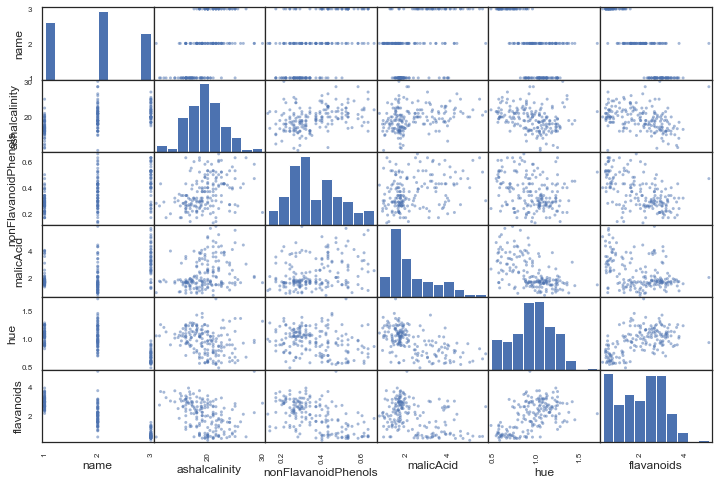

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(wineSub,figsize=(12,8))

name                   1.000000
ashalcalinity          0.517859
nonFlavanoidPhenols    0.489109
malicAcid              0.437776
colorIntensity         0.265668
ash                   -0.049643
magnesium             -0.209179
alcohol               -0.328222
proanthocyanins       -0.499130
hue                   -0.617369
proline               -0.633717
totalPhenols          -0.719163
od280_od315           -0.788230
flavanoids            -0.847498
Name: name, dtype: float64


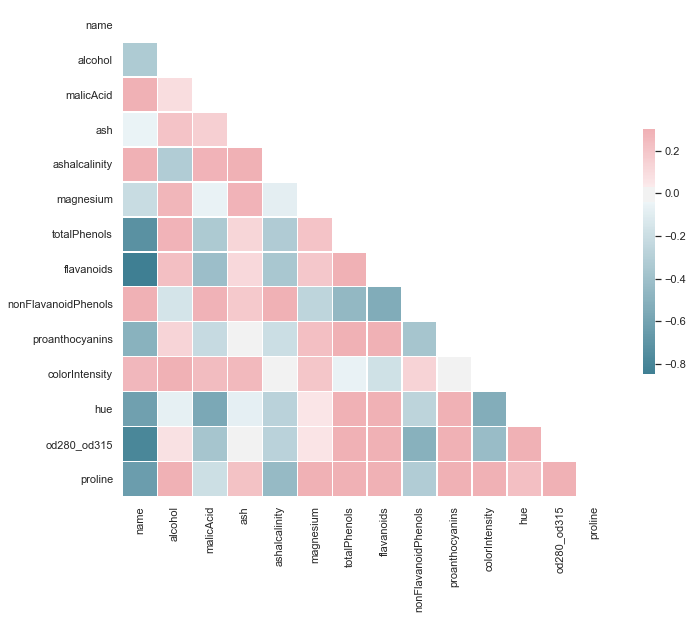

In [31]:
corr = wine[wine.columns].corr()
print(corr["name"].sort_values(ascending=False))
sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
X = wine.drop(['name','ash','colorIntensity','magnesium'],axis = 1) # correlation |0.3|을 커트라인으로 정했을 때 ash와 color Intensity 탈락
Y = wine[['name']]

In [33]:
wine.groupby('name').size()

name
1    59
2    71
3    48
dtype: int64

In [58]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 13)


## LDA & QDA

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, Y_train)
drA = lda.transform(A)

C:\Users\yoonk\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'A' is not defined

In [59]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X_train, )

TypeError: fit() missing 1 required positional argument: 'y'

## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score

paramsl2, scoresl2, aucsl2 = [],[],[]
for c in range(-5,6):
    lr = LogisticRegression(C=10**c, penalty='l2')
    lr.fit(X_train,Y_train)
    ypred = lr.predict(X_test)
    score = accuracy_score(Y_test,ypred)
    fpr, tpr, thresholds = roc_curve(Y_test,ypred)
    from sklearn.metrics import auc
    auc = auc(fpr,tpr)
    paramsl2.append(lr.C)
    scoresl2.append(score)
    aucsl2.append(auc)

# Using l1 penalty term
paramsl1, scoresl1, aucsl1 = [],[],[]
for c in range(-5,6):
    lr = LogisticRegression(C=10**c, penalty='l1')
    lr.fit(X_train,Y_train)
    ypred = lr.predict(X_test)
    score = accuracy_score(Y_test,ypred)
    fpr, tpr, thresholds = roc_curve(Y_test,ypred)
    from sklearn.metrics import auc
    auc = auc(fpr,tpr)
    paramsl1.append(lr.C)
    scoresl1.append(score)
    aucsl1.append(auc)
    
plt.plot(paramsl2,scoresl2,linestyle='--',color='blue', label='l2')
plt.plot(paramsl1,scoresl1,linestyle='--',color='red', label='l1')
plt.legend(loc='lower right')
plt.xscale('log')
plt.xlabel('parameter values')
plt.ylabel('Accuracy')
plt.ylim(0.65,1.0)
plt.title('Accuracy scores across parameter values for l1 and l2 regularization')
plt.show()

plt.plot(paramsl2, aucsl2, linestyle='--',color='blue', label='l2')
plt.plot(paramsl1, aucsl1, linestyle='--',color='red', label='l1')
plt.legend(loc='lower right')
plt.xscale('log')
plt.xlabel('parameter values')
plt.ylabel("AUCs'")
plt.ylim(0.45,1.0)
plt.title('AUC values across parameter values for l1 and l2 regularization')
plt.show()

print("Smallest C parameter value for max l2 accuracy: %0.3f" % paramsl2[min([i for i, s in zip(count(), scoresl2) if s == max(scoresl2)])])
print("Max l2 accuracy: %0.3f" % max(scoresl2))
print("Smallest C parameter value for max l1 accuracy: %0.3f" % paramsl1[min([i for i, s in zip(count(), scoresl1) if s == max(scoresl1)])])
print("Max l1 accuracy: %0.3f" % max(scoresl1))

print("Smallest C parameter value for max l2 AUC: %0.3f" % paramsl2[min([i for i, s in zip(count(), aucsl2) if s == max(aucsl2)])])
print("Max l2 AUC: %0.3f" % max(aucsl2))
print("Smallest C parameter value for max l1 AUC: %0.3f" % paramsl1[min([i for i, s in zip(count(), aucsl1) if s == max(aucsl1)])])
print("Max l1 AUC: %0.3f" % max(aucsl1))

C:\Users\yoonk\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yoonk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ValueError: multiclass format is not supported

## Logistic Regressions with Feature Expansion

In [ ]:
from sklearn.linear_model import LogisticRegression

In [52]:
Y_train.shape

(124, 1)

In [53]:
X_train.shape

(124, 10)